In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('feature_eng.csv')

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,ratecode_special_rates,pickup_hour,pickup_day,pickup_month,pickup_day_of_week,is_peak_hour,is_weekend,same_zone,trip_type,trip_duration
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,0.422371,238,239,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333542
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,0.422371,239,238,1.0,0.277161,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333857
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.322204,238,238,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,1,intra-zone,0.333709
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.355593,238,151,1.0,0.217684,0.5,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333548
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.222037,193,193,2.0,0.138382,0.5,0.5,...,False,0,1,1,2,0,0,1,intra-zone,0.333242


---

## Initial Data Overview ##

In [6]:
df.info

<bound method DataFrame.info of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1        2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2        2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3        2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4        2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...                      ...                   ...              ...   
5361464  2020-01-31 22:18:00   2020-01-31 22:41:00              1.0   
5361465  2020-01-31 22:21:13   2020-01-31 22:53:56              1.0   
5361466  2020-01-31 22:34:00   2020-01-31 22:48:00              1.0   
5361467  2020-01-31 22:13:00   2020-01-31 22:23:00              1.0   
5361468  2020-01-31 22:51:00   2020-01-31 23:22:00              1.0   

         trip_distance  PULocationID  DOLocationID  payment_type  fare_amount  \
0             0.422371           2

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [10]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [11]:
df.dtypes

tpep_pickup_datetime        datetime64[ns]
tpep_dropoff_datetime       datetime64[ns]
passenger_count                    float64
trip_distance                      float64
PULocationID                         int64
DOLocationID                         int64
payment_type                       float64
fare_amount                        float64
extra                              float64
mta_tax                            float64
tip_amount                         float64
tolls_amount                       float64
improvement_surcharge              float64
congestion_surcharge               float64
tip_percentage                     float64
fare_per_mile                      float64
avg_fare_per_pulocation            float64
avg_fare_per_dolocation            float64
ratecode_negotiated_fare              bool
ratecode_group_ride                   bool
ratecode_shared_ride                  bool
ratecode_other                        bool
ratecode_special_rates                bool
pickup_hour

#### Getting the Statistical Summary of Numeric Data ####

In [14]:
df[['fare_amount','trip_distance','fare_per_mile','trip_duration']].describe()

,fare_amount,trip_distance,fare_per_mile,trip_duration
count,5.361469e+06,5.361469e+06,5.361469e+06,5.361469e+06
mean,3.511416e-01,4.951749e-01,2.382012e-01,3.345186e-01
std,1.483618e-01,1.641020e-01,1.782577e-01,7.213820e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.375099e-01,3.722871e-01,1.145801e-01,3.336745e-01
50%,3.168121e-01,4.557596e-01,1.984142e-01,3.340732e-01
75%,4.357653e-01,5.859766e-01,3.120478e-01,3.346080e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### Unique Value Counts of Categorical Data ####

In [16]:
categorical_columns = [
    'PULocationID', 'DOLocationID', 'payment_type', 
    'ratecode_negotiated_fare', 'ratecode_group_ride', 
    'ratecode_shared_ride', 'ratecode_other', 'ratecode_special_rates',
    'trip_type', 'pickup_hour', 'pickup_day', 'pickup_month', 
    'pickup_day_of_week', 'is_peak_hour', 'is_weekend', 'same_zone'
]

# Count unique values in each categorical column
unique_values = {col: df[col].nunique() for col in categorical_columns}
unique_values

{'PULocationID': 253,
 'DOLocationID': 255,
 'payment_type': 2,
 'ratecode_negotiated_fare': 2,
 'ratecode_group_ride': 2,
 'ratecode_shared_ride': 2,
 'ratecode_other': 2,
 'ratecode_special_rates': 2,
 'trip_type': 2,
 'pickup_hour': 24,
 'pickup_day': 31,
 'pickup_month': 8,
 'pickup_day_of_week': 7,
 'is_peak_hour': 2,
 'is_weekend': 2,
 'same_zone': 2}

#### Top Categories ####

In [18]:
def top_categories(df, col, n=5):
    return df[col].value_counts().head(n)

# Apply the function to each categorical column
top_categories_info = {col: top_categories(df, col) for col in categorical_columns}
top_categories_info

{'PULocationID': PULocationID
 237    277054
 236    255577
 161    253238
 162    210412
 186    207887
 Name: count, dtype: int64,
 'DOLocationID': DOLocationID
 236    274968
 237    253683
 161    232289
 170    182241
 162    176649
 Name: count, dtype: int64,
 'payment_type': payment_type
 1.0    4008564
 2.0    1352905
 Name: count, dtype: int64,
 'ratecode_negotiated_fare': ratecode_negotiated_fare
 False    5361420
 True          49
 Name: count, dtype: int64,
 'ratecode_group_ride': ratecode_group_ride
 False    5360610
 True         859
 Name: count, dtype: int64,
 'ratecode_shared_ride': ratecode_shared_ride
 False    5361317
 True         152
 Name: count, dtype: int64,
 'ratecode_other': ratecode_other
 False    5355551
 True        5918
 Name: count, dtype: int64,
 'ratecode_special_rates': ratecode_special_rates
 False    5361450
 True          19
 Name: count, dtype: int64,
 'trip_type': trip_type
 inter-zone    5012039
 intra-zone     349430
 Name: count, dtype: int64

---

---

## Key Observations from Data Analysis

### Location Patterns
- Pickups and drop-offs are concentrated in a few key areas
- PULocationID 237 and DOLocationID 236 are the busiest

### Payment Methods
- Two main types, with type 1 being most common
- Suggests a preference for a particular payment method (e.g., cash or card)

### Special Rate Codes
- Special fare conditions (like negotiated fares or group rides) are rare

### Trip Characteristics
- Inter-zone trips significantly outnumber intra-zone trips
- Indicates people often travel between different city zones

### Time-Based Patterns
- Busiest pickup times: Late afternoon to early evening, peaking at 6 PM
- Certain days of the month (17th and 30th) show higher activity
- Weekdays, especially mid-week, are busier than weekends

### Peak Hours and Day Type
- Most trips occur during non-peak hours
- Weekday trips are more common than weekend trips
- Suggests a high volume of regular commuter travel

These observations provide insights into travel patterns, busy locations, and customer preferences, which can be valuable for service optimization and planning.

---

## Univariate Analysis ##

In [20]:
import seaborn as sns

In [21]:
numerical_cols = ['fare_amount','trip_distance','fare_per_mile','tip_percentage','trip_duration'] 

In [23]:
df[numerical_cols].head()

,fare_amount,trip_distance,fare_per_mile,tip_percentage,trip_duration
0,0.237510,0.422371,0.133690,0.000010,0.333542
1,0.277161,0.422371,0.205882,0.000009,0.333857
2,0.237510,0.322204,0.566845,0.000007,0.333709
3,0.217684,0.355593,0.296123,0.000010,0.333548
4,0.138382,0.222037,0.261823,0.000000,0.333242


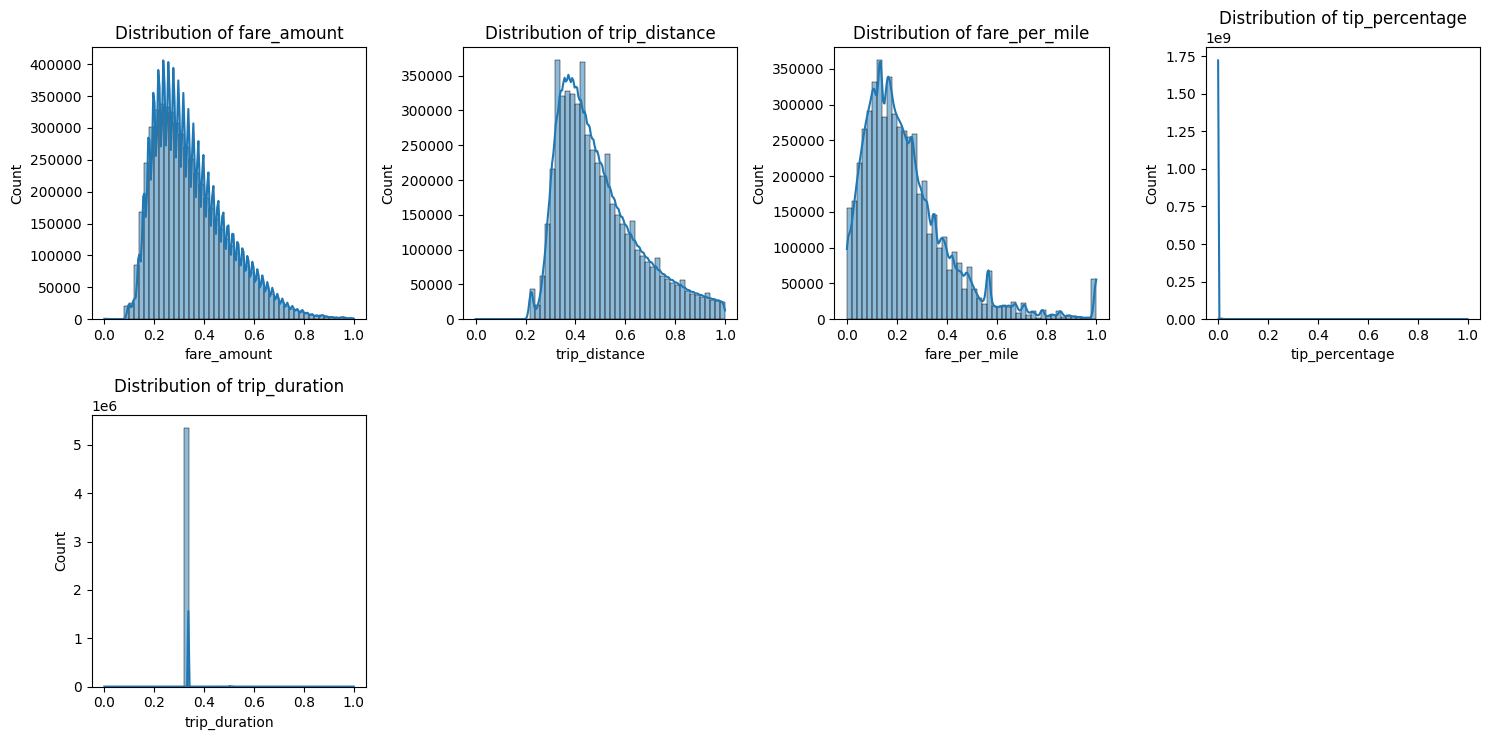

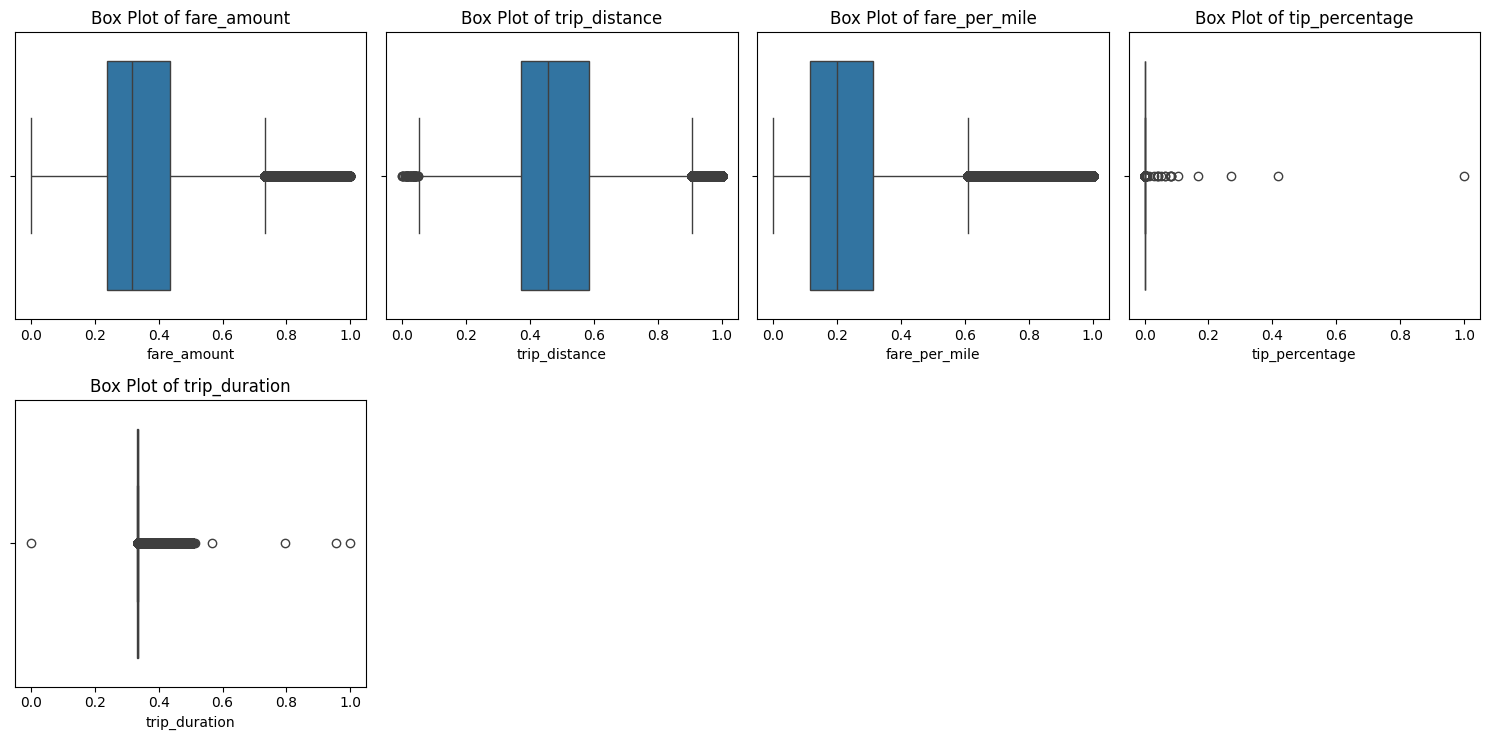

Skewness of Numerical Features:
fare_amount          0.914585
trip_distance        0.950998
fare_per_mile        1.629640
tip_percentage    1662.441034
trip_duration       23.177245
dtype: float64


In [29]:
#Histogram
plt.figure(figsize=(15, 7.5))  

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#BoxPlot
plt.figure(figsize=(15, 7.5)) 

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Calculate skewness for numerical features
skewness = df[numerical_cols].skew()
print("Skewness of Numerical Features:")
print(skewness)

#### Identifying the Skewness and Dealing with Outliers ####